# 2. Linear regression

In [1]:
import torch
import torch.optim as optim

## Data definition
- 데이터는 torch.tensor
- 입력 따로, 출력 따로
    - 입력: x_train
    - 출력: y_train
    - 입출력은 x,y로 구분

In [2]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[2],[4],[6]])

## Hypothesis
$y=Wx+b$
- Weight와 Bias 0으로 초기화
    - 항상 출력 0을 예측
- require_grad=True
    - 학습할 것이라고 명시

In [3]:
W=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Compute loss
- Mean Squared Error(MSE)
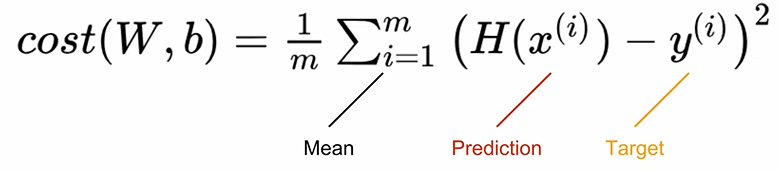

- torch.mean 으로 평균 계산
- 한 줄인데 읽기 편한 코드

In [4]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient descent
- torch.optim 라이브러리 사용
    - [W, b]는 학습할 tensor들
    - lr=0.01은 learning rate
    
    
- 항상 붙어다니는 3줄
    - zero_grad()로 gradient 초기화
    - backward()로 gradient 계산
    - step()으로 개선

In [5]:
optimizer=optim.SGD([W,b], lr=0.01)

optimizer.zero_grad()
cost.backward()
optimizer.step()

## Full training code
한번만
1. 데이터 정의
2. Hypothesis 초기화
3. Optimizer 정의


반복
1. Hypothesis 예측
2. Cost 계산
3. Optimizer로 학습

In [6]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[2],[4],[6]])

W=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer=optim.SGD([W,b], lr=0.01)

nb_epochs=1000
for epoch in range(1, nb_epochs+1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

# 3. Deeper Look at GD

## Hypothesis(Linear Regression)
$H(x)=Wx+b$

In [7]:
W=torch.zeros(1, requires_grad=True)
b=torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Simpler Hypothesis Function
$H(x)=Wx$

In [8]:
W=torch.zeros(1, requires_grad=True)
# b=torch.zeros(1, requires_grad=True)
hypothesis = x_train * W

## Dummy Data
- input = output

In [9]:
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[1],[2],[3]])

## What is the best model?
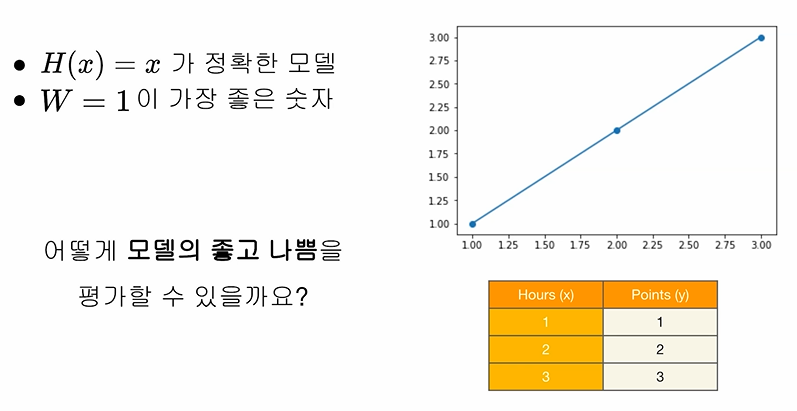

## Cost function: Intutition
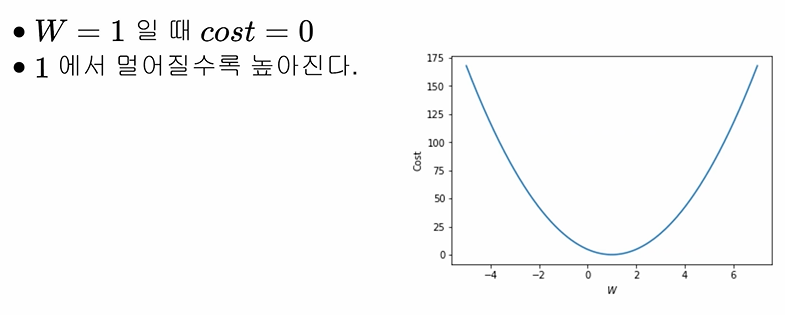

## Cost function: MSE
- Mean squared Error(MSE)
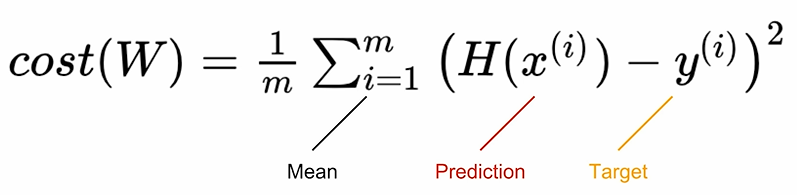

In [10]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent: Intuition
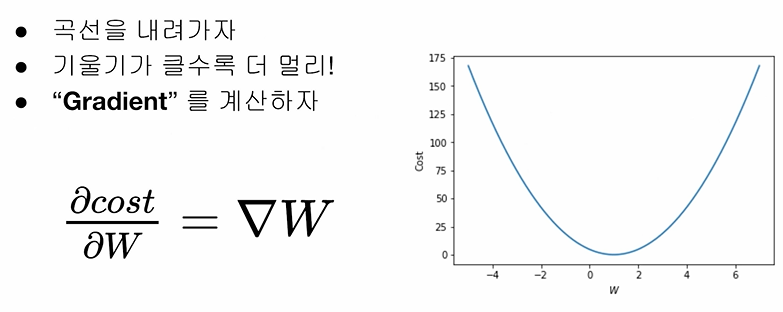

# Gradient Descent: The Math
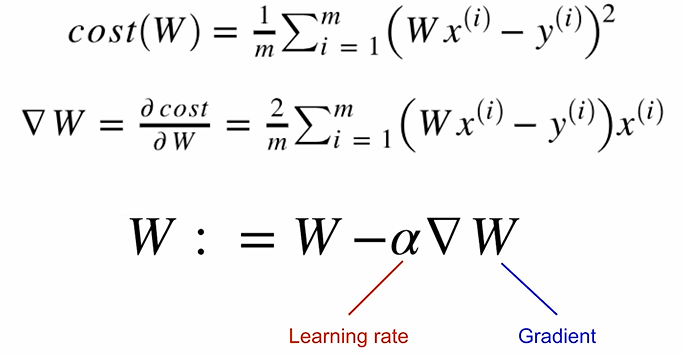

## Gradient Descent: Code
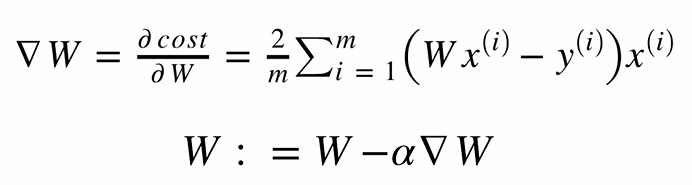

In [ ]:
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W -= lr * gradient

## Full Code
- Epoch: 데이터로 학습한 횟수
- 학습하면서 점점:
    - 1에 수렴하는 W
    - 줄어드는 cost

In [12]:
# 데이터
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[1],[2],[3]])

# 모델 초기화
W=torch.zeros(1)

# learning rate 설정
lr=0.1

nb_epochs=10
for epoch in range(nb_epochs+1):
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))
    
    # cost gradient로 H(x) 계산
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


## Gradient Descent with `torch.optim`
- torch.optim 으로도 gradient descent를 할 수 있다.
    - 시작할 때 Optimizer 정의
    - optimizer.zero_grad()로 gradient를 0으로 초기화
    - cost.backward()로 gradient 계산
    - optimizer.step()으로 gradient descent
   

In [ ]:
# optimizer 설정
optimizer=optim.SGD([W], lr=0.15)

# cost로 H(x) 개선
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Full Code with `torch.optim`
- 학습하면서 점점
    - 1에 수렴하는 W
    - 줄어드는 cost

In [13]:
# 데이터
x_train=torch.FloatTensor([[1],[2],[3]])
y_train=torch.FloatTensor([[1],[2],[3]])

# 모델 초기화
W=torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer=optim.SGD([W], lr=0.15)

nb_epochs=10
for epoch in range(nb_epochs+1):
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), cost.item()))
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
